In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import re
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
train.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
label = train[["toxic" , "severe_toxic" ,"obscene" , "threat" , "insult" , "identity_hate"]]
label=label.as_matrix()

C:\Users\khush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
comment = train["comment_text"]
comment=comment.as_matrix()

C:\Users\khush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


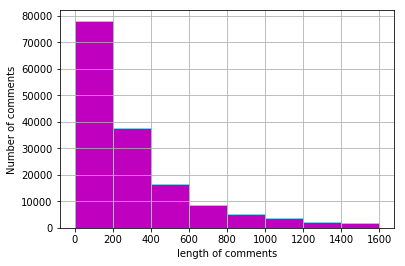

In [7]:
word_cnt = [len(comment[i]) for i in range(comment.shape[0])]
bins = [1,200,400,600,800,1000,1200,1400,1600]
plt.hist(word_cnt,bins,color="m",ec="skyblue")
plt.xlabel("length of comments")
plt.ylabel("Number of comments")
plt.grid(True)

In [8]:
toxicness = ["toxic" , "severe_toxic" ,"obscene" , "threat" , "insult" , "identity_hate"]
for i in toxicness:
    print("train[",i,"] === \n",train[i].value_counts(),"\n")

train[ toxic ] === 
 0    144277
1     15294
Name: toxic, dtype: int64 

train[ severe_toxic ] === 
 0    157976
1      1595
Name: severe_toxic, dtype: int64 

train[ obscene ] === 
 0    151122
1      8449
Name: obscene, dtype: int64 

train[ threat ] === 
 0    159093
1       478
Name: threat, dtype: int64 

train[ insult ] === 
 0    151694
1      7877
Name: insult, dtype: int64 

train[ identity_hate ] === 
 0    158166
1      1405
Name: identity_hate, dtype: int64 



In [9]:
count=[0,0,0,0,0,0]

for i in range(len(comment)):
    if label[i][0]:
        count[0]+=1
        
    if label[i][1]:
        count[1]+=1
        
    if label[i][2]:
        count[2]+=1
        
    if label[i][3]:
        count[3]+=1
        
    if label[i][4]:
        count[4]+=1
        
    if label[i][5]:
        count[5]+=1
        
count

[15294, 1595, 8449, 478, 7877, 1405]

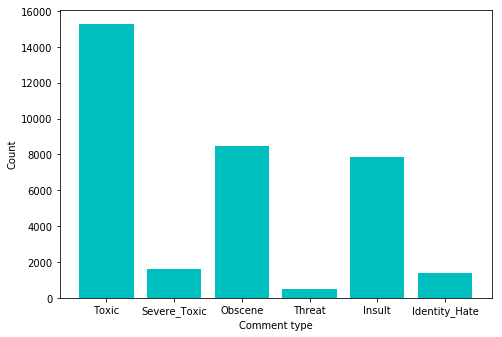

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
comm = ['Toxic', 'Severe_Toxic', 'Obscene', 'Threat', 'Insult' ,'Identity_Hate']
ax.bar(comm,count,color='c')
plt.xlabel("Comment type")
plt.ylabel("Count")
plt.show()

In [76]:
# x=map(lambda x:159571/x,count)
# print(x)
per_count = [159571/x for x in count]
per_count

[10.433568719759382,
 100.04451410658307,
 18.886377086045687,
 333.8305439330544,
 20.25783927891329,
 113.57366548042705]

In [11]:
y = np.zeros(label.shape)

for i in range(comment.shape[0]):
    l = len(comment[i])
    if label[i][0]:
        y[i][0]=l
        
    if label[i][1]:
        y[i][1]=l
        
    if label[i][2]:
        y[i][2]=l
        
    if label[i][3]:
        y[i][3]=l
        
    if label[i][4]:
        y[i][4]=l
        
    if label[i][5]:
        y[i][5]=l
        

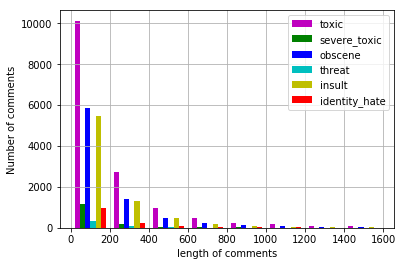

In [12]:
plt.hist(y,bins,color=["m","g","b","c","y","r"],label=toxicness)
plt.xlabel("length of comments")
plt.ylabel("Number of comments")
plt.legend()
plt.grid(True)

In [83]:
comments=[]
labels=[]
count = [0,0,0,0,0,0]
for i in range(comment.shape[0]):
    if len(comment[i])<=400:
        comments.append(comment[i])
        labels.append(label[i])
        if label[i][0]:
            count[0]+=1

        if label[i][1]:
            count[1]+=1

        if label[i][2]:
            count[2]+=1

        if label[i][3]:
            count[3]+=1

        if label[i][4]:
            count[4]+=1

        if label[i][5]:
            count[5]+=1
        
labels = np.asarray(labels)
print(len(comments))
count

115910


[12873, 1357, 7230, 413, 6782, 1181]

In [14]:
import string
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print(punctuation_edit)
print(len(punctuation_edit))
# outtab = "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
outtab = "                                         "
print(len(outtab))
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789
41
41


In [15]:
# English stopwords incuding punctuations
stopword = ['haven', 'be', 'do', 'between', 'same', 'won', 'mustn', 'were', 'by', 'theirs', 'with', "hasn't", 
            'my', 'll', 'him', 'out', 'but', 'd', "should've", "haven't", 'shouldn', 'all', 'than', 'on', 'aren',
            'being', 're', "weren't", 'where', 'we', 'his', 'it', "that'll", 'while', "shouldn't", 'some', 'over', 
            'yourself', "needn't", 'this', 'there', "mustn't", 'mightn', 'against', 'hers', 'isn', 'each', 'as', "won't",
            'should', 'above', 'don', 'themselves', 'itself', 'own', 'to', 'few', "don't", 'did', 't', 'wasn', "isn't",
            "you'll", 'up', 'just', 'myself', 'these', 'why', 'those', 'doing', 'shan', 'am', 'under', 'has', 'ourselves',
            "you've", 'other', 'that', 'i', 'too', 'the', 'which', 'is', 'herself', 'then', 'didn', "didn't", 'no', 'more',
            'of', 'doesn', 'have', 'her', 'down', 'o', 'not', 'can', 'yourselves', 'any', "it's", 'about', 'ours', "hadn't",
            'he', 'a', 'again', "she's", 've', "wouldn't", 'only', 'y', 'such', "couldn't", 'and', 's', 'himself', 'after', 
            'they', 'had', 'when', "you're", "doesn't", 'their', 'will', 'couldn', 'in', 'does', 'or', 'very', "aren't", 
            'what', 'now', 'an', 'until', 'if', 'during', 'she', 'further', "shan't", 'your', 'them', 'me', 'because', 
            'its', 'nor', 'weren', 'yours', 'into', 'wouldn', 'through', 'are', 'having', "mightn't", 'whom', 'here', 
            'off', 'been', 'both', 'at', 'below', 'for', 'needn', 'was', 'once', 'ain', 'our', 'before', 'how', 'fuck' , 'ma', 
            'hadn', "you'd", 'most', 'who', 'you', 'so', "wasn't", 'hasn', 'm', 'from' ,'(' ,')' ,'[' ,']','{' ,'}','"' ,'#',
            '@' ,'!','$' ,'%','^' ,'&','*' ,'+','-' ,'_',';',':',"<",">",'.',"/","?","~" ,"=","~" ,"`","|"]

for i in range(ord('b'), ord('z')+1):
    stopword.append(chr(i))
    
for i in range(ord('0'),ord('9')+1):
    stopword.append(chr(i))
    
for i in range(ord('A'),ord('Z')+1):
    stopword.append(chr(i))
    
print(stopword)

['haven', 'be', 'do', 'between', 'same', 'won', 'mustn', 'were', 'by', 'theirs', 'with', "hasn't", 'my', 'll', 'him', 'out', 'but', 'd', "should've", "haven't", 'shouldn', 'all', 'than', 'on', 'aren', 'being', 're', "weren't", 'where', 'we', 'his', 'it', "that'll", 'while', "shouldn't", 'some', 'over', 'yourself', "needn't", 'this', 'there', "mustn't", 'mightn', 'against', 'hers', 'isn', 'each', 'as', "won't", 'should', 'above', 'don', 'themselves', 'itself', 'own', 'to', 'few', "don't", 'did', 't', 'wasn', "isn't", "you'll", 'up', 'just', 'myself', 'these', 'why', 'those', 'doing', 'shan', 'am', 'under', 'has', 'ourselves', "you've", 'other', 'that', 'i', 'too', 'the', 'which', 'is', 'herself', 'then', 'didn', "didn't", 'no', 'more', 'of', 'doesn', 'have', 'her', 'down', 'o', 'not', 'can', 'yourselves', 'any', "it's", 'about', 'ours', "hadn't", 'he', 'a', 'again', "she's", 've', "wouldn't", 'only', 'y', 'such', "couldn't", 'and', 's', 'himself', 'after', 'they', 'had', 'when', "you're

In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

ps = PorterStemmer()
lm = WordNetLemmatizer()

def word_duniya(text_data):
    text = text_data.lower().translate(trantab)

    words = word_tokenize(text)
    toxicness = ''
    for word in words:
        if word not in stopword:
            word = ps.stem(lm.lemmatize(word,pos="v"))
            toxicness = toxicness + word + ' '

    if i%300==0:
        print(i)
            
    return toxicness

In [17]:
toxic_1_words=''
severe_toxic_1_words=''
obscene_1_words=''
threat_1_words=''
insult_1_words=''
identity_hate_1_words=''


In [18]:


for i in range(len(comments)):
    comments[i] = word_duniya(comments[i])
    if label[i][0]:
        toxic_1_words+=comments[i]
        
    if label[i][1]:
        severe_toxic_1_words+=comments[i]
        
    if label[i][2]:
        obscene_1_words+=comments[i]
        
    if label[i][3]:
        threat_1_words+=comments[i]
        
    if label[i][4]:
        insult_1_words+=comments[i]
        
    if label[i][5]:
        identity_hate_1_words+=comments[i]
        

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000
15300
15600
15900
16200
16500
16800
17100
17400
17700
18000
18300
18600
18900
19200
19500
19800
20100
20400
20700
21000
21300
21600
21900
22200
22500
22800
23100
23400
23700
24000
24300
24600
24900
25200
25500
25800
26100
26400
26700
27000
27300
27600
27900
28200
28500
28800
29100
29400
29700
30000
30300
30600
30900
31200
31500
31800
32100
32400
32700
33000
33300
33600
33900
34200
34500
34800
35100
35400
35700
36000
36300
36600
36900
37200
37500
37800
38100
38400
38700
39000
39300
39600
39900
40200
40500
40800
41100
41400
41700
42000
42300
42600
42900
43200
43500
43800
44100
44400
44700
45000
45300
45600
45900
46200
46500
46800
47100
47400
47700
48000
48300
48600
48900
49200
49500
49800
50100
50400
50700
51000
51300
51600
51

In [19]:
print(len(toxic_1_words),len(severe_toxic_1_words),len(obscene_1_words))
print(len(threat_1_words),len(insult_1_words),len(identity_hate_1_words))

988828 103066 547713
32451 508713 88855


In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
wc = WordCloud(width=800 , height=800 ,max_words = 200 ,max_font_size=120)

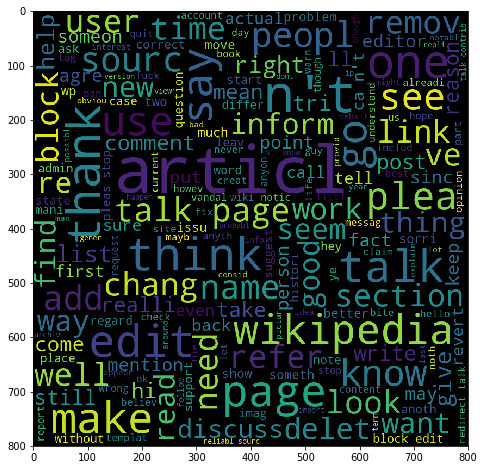

In [103]:
toxic_1_wordcloud = wc.generate(toxic_1_words)
plt.figure(figsize=(8,8))
plt.imshow(toxic_1_wordcloud)
plt.show()


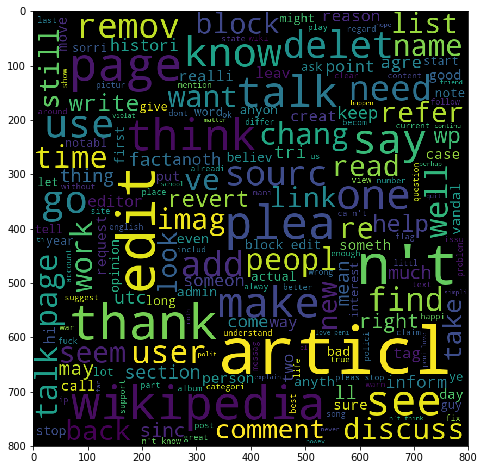

In [104]:
severe_toxic_1_wordcloud = wc.generate(severe_toxic_1_words)
plt.figure(figsize=(8,8))
plt.imshow(severe_toxic_1_wordcloud)
plt.show()


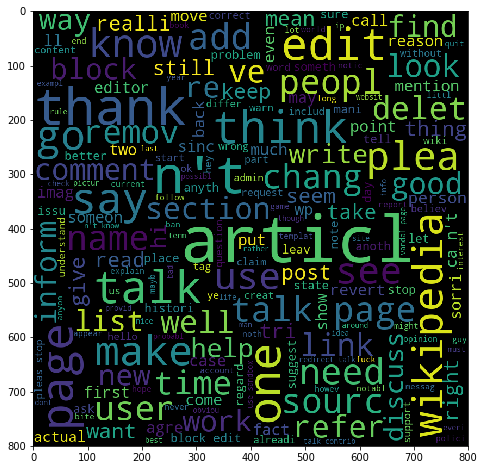

In [105]:
obscene_1_wordcloud = wc.generate(obscene_1_words)
plt.figure(figsize=(8,8))
plt.imshow(obscene_1_wordcloud)
plt.show()


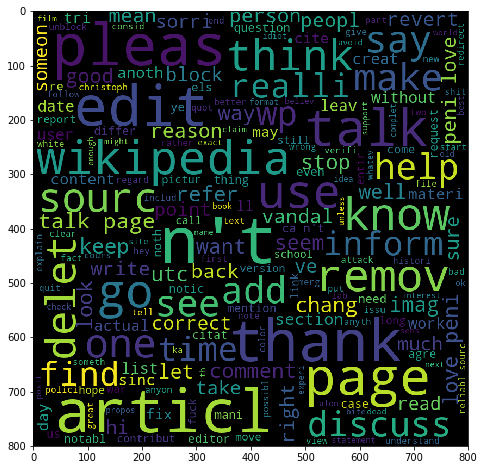

In [106]:
threat_1_wordcloud = wc.generate(threat_1_words)
plt.figure(figsize=(8,8))
plt.imshow(threat_1_wordcloud)
plt.show()


In [100]:
insult_1_wordcloud = wc.generate(insult_1_words)
plt.figure(figsize=(8,8))
plt.imshow(insult_1_wordcloud)
plt.show()



In [101]:
identity_hate_1_wordcloud = wc.generate(identity_hate_1_words)
plt.figure(figsize=(8,8))
plt.imshow(identity_hate_1_wordcloud)
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
train_test_x_cvt = count_vector.fit_transform(comments)

In [28]:
print(train_test_x_cvt.shape)
print(count_vector.get_feature_names())

(115910, 70865)
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaani', 'aaaaaaaaaah', 'aaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaaadm', 'aaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh', 'aaaaaaaari', 'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh', 'aaaaah', 'aaaannnnyyyywwwwhhhheeeerrrreee', 'aaaawwww', 'aaaghh', 'aaah', 'aaai', 'aaajad', 'aaand', 'aaarrrgggh', 'aaaww', 'aab', 'aabov', 'aac', 'aacargo', 'aacd', 'aachen', 'aachi', 'aad', 'aadil', 'aadmi', 'aadministr', 'aae', 'aaf', 'aaffect', 'aafia', 'aag', 'aagin', 'aah', 'aahh', 'aahil', 'aai', 'aajacksoniv', 'aal', 'aalborg', 'aalertbot', 'aalexa', 'aaliyah', 'aalst', 'aam', 'aamir', 'aamirjamil', 'aan', 'aana', 'aand', 'aang', 'aao', 'aaot', 'aap', 'aapropri', 'aar', 'aarab', 'aarbitr', 'aardman', 'aardvark', 'aarem', 'aargh', 'aarionrhod', 'aaron', 'aaroncrick', 'aaronport', 'aarrrrrrgh', 'aaryanrajput', 'aashto', 'aatc', 'aaug', 'aaviksoo', 'aaw', 'aayeg', 'aazatoth', 'aazewck', 'ab', 'aba', 'abacha', 

In [29]:
train_x_cvt = train_test_x_cvt[:80000,:] 
test_x_cvt = train_test_x_cvt[80000:,:]
train_y = labels[:80000,:]
test_y = labels[80000:,:]

print(train_x_cvt.shape)
print(test_x_cvt.shape)

(80000, 70865)
(35910, 70865)


In [30]:
print(train_y.shape)
print(test_y.shape)

(80000, 6)
(35910, 6)


In [31]:
from sklearn.metrics import accuracy_score, hamming_loss

accuracy_score = []
hamming_loss = []

def evaluate_score(Y_test,predict): 
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy_score.append(accuracy)
    hamming_loss.append(loss)

In [32]:
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Count vectorizer

### Count vectorizer, BinaryRelavance and SVC

In [54]:
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(train_x_cvt, train_y)

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
        require_dense=[False, True])

In [56]:
predictions = classifier.predict(test_x_cvt)
predictions

<35910x6 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Column format>

In [57]:
evaluate_score(test_y,predictions)

Accuracy : 88.41826789195211
Hamming_loss : 4.272718834122343


### Count vectorizer, BinaryRelavance and Naive_bayes

In [58]:
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(train_x_cvt, train_y)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[False, True])

In [59]:
predictions = classifier.predict(test_x_cvt)
evaluate_score(test_y,predictions)

Accuracy : 88.05068226120858
Hamming_loss : 3.391348742225935


### Count vectorizer, BinaryRelavance and Ensemble

In [60]:
classifier = BinaryRelevance(classifier = RandomForestClassifier(n_estimators = 20), require_dense = [False, True])
classifier.fit(train_x_cvt, train_y)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        require_dense=[False, True])

In [61]:
predictions = classifier.predict(test_x_cvt)
evaluate_score(test_y,predictions)

Accuracy : 89.33166248955723
Hamming_loss : 2.668708809059686


### ClassifierChain and SVC

In [109]:
# classifier = ClassifierChain(classifier = SVC())
# classifier.fit(train_x_cvt, train_y)

In [ ]:
# predictions = classifier.predict(test_x)
# evaluate_score(test_y,predictions)

### ClassifierChain and Naive_bayes

In [ ]:
# classifier = ClassifierChain(classifier = MultinomialNB())
# classifier.fit(train_x, train_y)

In [ ]:
# predictions = classifier.predict(test_x)
# evaluate_score(test_y,predictions)

### ClassifierChain and Ensemble

In [ ]:
# classifier = ClassifierChain(classifier = RandomForestClassifier(n_estimators = 20))
# classifier.fit(train_x, train_y)

In [ ]:
# predictions = classifier.predict(test_x)
# evaluate_score(test_y,predictions)

# TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_test_x_tfidf = tfidf.fit_transform(comments)

In [63]:
print(train_test_x_tfidf.shape)
print(tfidf.get_feature_names())

(115910, 70865)
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaani', 'aaaaaaaaaah', 'aaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaaadm', 'aaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh', 'aaaaaaaari', 'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh', 'aaaaah', 'aaaannnnyyyywwwwhhhheeeerrrreee', 'aaaawwww', 'aaaghh', 'aaah', 'aaai', 'aaajad', 'aaand', 'aaarrrgggh', 'aaaww', 'aab', 'aabov', 'aac', 'aacargo', 'aacd', 'aachen', 'aachi', 'aad', 'aadil', 'aadmi', 'aadministr', 'aae', 'aaf', 'aaffect', 'aafia', 'aag', 'aagin', 'aah', 'aahh', 'aahil', 'aai', 'aajacksoniv', 'aal', 'aalborg', 'aalertbot', 'aalexa', 'aaliyah', 'aalst', 'aam', 'aamir', 'aamirjamil', 'aan', 'aana', 'aand', 'aang', 'aao', 'aaot', 'aap', 'aapropri', 'aar', 'aarab', 'aarbitr', 'aardman', 'aardvark', 'aarem', 'aargh', 'aarionrhod', 'aaron', 'aaroncrick', 'aaronport', 'aarrrrrrgh', 'aaryanrajput', 'aashto', 'aatc', 'aaug', 'aaviksoo', 'aaw', 'aayeg', 'aazatoth', 'aazewck', 'ab', 'aba', 'abacha', 

In [64]:
train_x_tfidf = train_test_x_tfidf[:80000,:] 
test_x_tfidf = train_test_x_tfidf[80000:,:]

### TF-IDF, BinaryRelavance and SVC

In [65]:
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(train_x_tfidf, train_y)

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
        require_dense=[False, True])

In [77]:
predictions = classifier.predict(test_x_tfidf)
evaluate_score(test_y,predictions)

Accuracy : 88.41826789195211
Hamming_loss : 4.272718834122343


### TF-IDF, BinaryRelavance and Naive_bayes

In [79]:
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(train_x_tfidf, train_y)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[False, True])

In [80]:
predictions = classifier.predict(test_x_tfidf)
evaluate_score(test_y,predictions)

Accuracy : 88.68003341687553
Hamming_loss : 3.672143321266128


### TF-IDF, BinaryRelavance and Ensemble

In [81]:
classifier = BinaryRelevance(classifier = RandomForestClassifier(n_estimators = 20), require_dense = [False, True])
classifier.fit(train_x_tfidf, train_y)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        require_dense=[False, True])

In [82]:
predictions = classifier.predict(test_x_tfidf)
evaluate_score(test_y,predictions)

Accuracy : 89.89696463380675
Hamming_loss : 2.581917757356354


In [2]:
# accuracy_score = [88.42,88.05,89.33,88.42,88.68,89.90]
# hamming_loss = [4.27,3.39,2.67,4.27,3.67,2.58]
algo = ["cvt-svm","cvt-Naive","cvt-Ensem","tfidf-svm","tfidf-Naive","tfidf-Ensem"]
new=np.arange(len(algo))

No handles with labels found to put in legend.


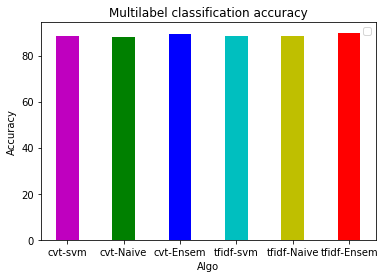

In [7]:
plt.bar(algo,accuracy_score,width=0.4,color=["m","g","b","c","y","r"])
plt.xticks(new,algo)
plt.xlabel('Algo')
plt.ylabel('Accuracy')
plt.title('Multilabel classification accuracy')
plt.legend()

No handles with labels found to put in legend.


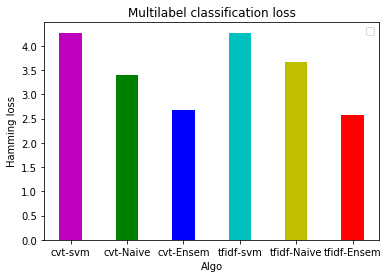

In [8]:
plt.bar(algo,hamming_loss,width=0.4,color=["m","g","b","c","y","r"])
plt.xticks(new,algo)
plt.xlabel('Algo')
plt.ylabel('Hamming loss')
plt.title('Multilabel classification loss')
plt.legend()